### Notebook: using jsonstat.py with eurostat api

This Jupyter notebook shows the python library [jsonstat.py](http://github.com/26fe/jsonstat.py) in action. 
It shows how to explore dataset downloaded from a data provider. This notebook uses some datasets from Eurostat. 

Eurostat provides a rest api to download its datasets. You can find details about the api [here](http://ec.europa.eu/eurostat/web/json-and-unicode-web-services)
It is possible to use a [query builder](http://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder) for discovering the rest api parameters  <img src="eurostat_query_builder_step2.png" width="50%" height="50%"/>

In [1]:
# all import here
from __future__ import print_function
import os
import pandas as pd
import jsonstat

import matplotlib as plt
%matplotlib inline

#### Exploring data with one dimension (time) with size > 1

Download or use the json file cached on disk. Caching file is useful to avoid download file every time. Caching can speed the development, and provides consistent result.
You can see the raw data [here](http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&unit=EUR_HAB&indic_na=B1GM)

In [2]:
url_1 = 'http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&unit=EUR_HAB&indic_na=B1GM'
file_name_1 = "eurostat-name_gpd_c-geo_IT.json"

file_path_1 = os.path.abspath(os.path.join("..", "tests", "fixtures", "eurostat", file_name_1))
if os.path.exists(file_path_1):
    print("using alredy donwloaded file {}".format(file_path_1))
else:
    print("download file")
    jsonstat.download(url_1, file_name_1)
    file_path_1 = file_name_1

using alredy donwloaded file /Users/26fe_nas/gioprj.on_mac/prj.python/jsonstat.py/tests/fixtures/eurostat/eurostat-name_gpd_c-geo_IT.json


Initialize JsonStatCollection with eurostat data and print some info about the collection.

In [3]:
collection_1 = jsonstat.from_file(file_path_1)
collection_1

0: dataset 'nama_gdp_c'

Previous collection contains only a dataset named '`nama_gdp_c`'

In [4]:
nama_gdp_c_1 = collection_1.dataset('nama_gdp_c')
nama_gdp_c_1

name:   'nama_gdp_c'
title:  'GDP and main components - Current prices'
size: 69
4 dimensions:
  0: dim id: 'unit' label: 'unit' size: '1' role: 'None'
  1: dim id: 'indic_na' label: 'indic_na' size: '1' role: 'None'
  2: dim id: 'geo' label: 'geo' size: '1' role: 'None'
  3: dim id: 'time' label: 'time' size: '69' role: 'None'

All dimensions of the dataset '`nama_gdp_c`' are of size 1 with exception of `time` dimension. Let's explore the time dimension.

In [5]:
nama_gdp_c_1.dimension('time')

index
  pos idx      label   
    0 '1946'   '1946'  
    1 '1947'   '1947'  
    2 '1948'   '1948'  
    3 '1949'   '1949'  
    4 '1950'   '1950'  
    5 '1951'   '1951'  
    6 '1952'   '1952'  
    7 '1953'   '1953'  
    8 '1954'   '1954'  
    9 '1955'   '1955'  
   10 '1956'   '1956'  
   11 '1957'   '1957'  
   12 '1958'   '1958'  
   13 '1959'   '1959'  
   14 '1960'   '1960'  
   15 '1961'   '1961'  
   16 '1962'   '1962'  
   17 '1963'   '1963'  
   18 '1964'   '1964'  
   19 '1965'   '1965'  
   20 '1966'   '1966'  
   21 '1967'   '1967'  
   22 '1968'   '1968'  
   23 '1969'   '1969'  
   24 '1970'   '1970'  
   25 '1971'   '1971'  
   26 '1972'   '1972'  
   27 '1973'   '1973'  
   28 '1974'   '1974'  
   29 '1975'   '1975'  
   30 '1976'   '1976'  
   31 '1977'   '1977'  
   32 '1978'   '1978'  
   33 '1979'   '1979'  
   34 '1980'   '1980'  
   35 '1981'   '1981'  
   36 '1982'   '1982'  
   37 '1983'   '1983'  
   38 '1984'   '1984'  
   39 '1985'   '1985'  
   40 '198

Get value for year 2012.

In [6]:
nama_gdp_c_1.value(time='2012')

25700

Convert the jsonstat data into a pandas dataframe.

In [7]:
df_1 = nama_gdp_c_1.to_data_frame('time', content='id')
df_1.tail()

,unit,indic_na,geo,Value
time,,,,
2010,EUR_HAB,B1GM,IT,25700
2011,EUR_HAB,B1GM,IT,26000
2012,EUR_HAB,B1GM,IT,25700
2013,EUR_HAB,B1GM,IT,25600
2014,EUR_HAB,B1GM,IT,NaN


Adding a simple plot

/extra/opt/anaconda/envs/python27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


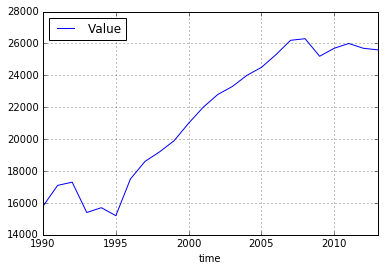

In [8]:
df_1 = df_1.dropna() # remove rows with NaN values
df_1.plot(grid=True)

#### Exploring data with two dimensions (geo, time) with size > 1
Download or use the jsonstat file cached on disk. The cache is used to avoid internet download during the devolopment to make the things a bit faster.
You can see the raw data [here](http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&geo=FR&unit=EUR_HAB&indic_na=B1GM)

In [9]:
url_2 = 'http://ec.europa.eu/eurostat/wdds/rest/data/v1.1/json/en/nama_gdp_c?precision=1&geo=IT&geo=FR&unit=EUR_HAB&indic_na=B1GM'
file_name_2 = "eurostat-name_gpd_c-geo_IT_FR.json"

file_path_2 = os.path.abspath(os.path.join("..", "tests", "fixtures", "eurostat", file_name_2))
if os.path.exists(file_path_2):
    print("using alredy donwloaded file {}".format(file_path_2))
else:
    print("download file and storing on disk")
    jsonstat.download(url, file_name_2)
    file_path_2 = file_name_2

using alredy donwloaded file /Users/26fe_nas/gioprj.on_mac/prj.python/jsonstat.py/tests/fixtures/eurostat/eurostat-name_gpd_c-geo_IT_FR.json


In [10]:
collection_2 = jsonstat.from_file(file_path_2)
nama_gdp_c_2 = collection_2.dataset('nama_gdp_c')
nama_gdp_c_2

name:   'nama_gdp_c'
title:  'GDP and main components - Current prices'
size: 138
4 dimensions:
  0: dim id: 'unit' label: 'unit' size: '1' role: 'None'
  1: dim id: 'indic_na' label: 'indic_na' size: '1' role: 'None'
  2: dim id: 'geo' label: 'geo' size: '2' role: 'None'
  3: dim id: 'time' label: 'time' size: '69' role: 'None'

In [11]:
nama_gdp_c_2.dimension('geo')

index
  pos idx      label   
    0 'FR'     'France'
    1 'IT'     'Italy' 

In [12]:
nama_gdp_c_2.value(time='2012',geo='IT')

25700

In [13]:
nama_gdp_c_2.value(time='2012',geo='FR')

31100

In [14]:
df_2 = nama_gdp_c_2.to_table(content='id',rtype=pd.DataFrame)
df_2.tail()

,unit,indic_na,geo,time,Value
133,EUR_HAB,B1GM,IT,2010,25700
134,EUR_HAB,B1GM,IT,2011,26000
135,EUR_HAB,B1GM,IT,2012,25700
136,EUR_HAB,B1GM,IT,2013,25600
137,EUR_HAB,B1GM,IT,2014,NaN


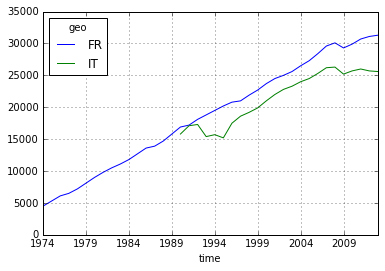

In [15]:
df_FR_IT = df_2.dropna()[['time', 'geo', 'Value']]
df_FR_IT = df_FR_IT.pivot('time', 'geo', 'Value')
df_FR_IT.plot(grid=True)

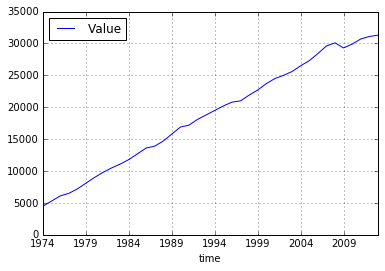

In [16]:
df_3 = nama_gdp_c_2.to_data_frame('time', content='id', blocked_dims={'geo':'FR'})
df_3 = df_3.dropna()
df_3.plot(grid=True)

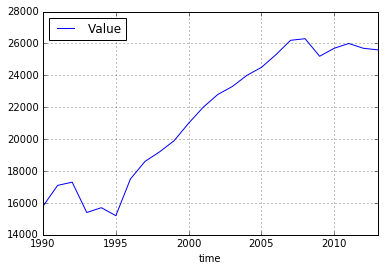

In [17]:
df_4 = nama_gdp_c_2.to_data_frame('time', content='id', blocked_dims={'geo':'IT'})
df_4 = df_4.dropna()
df_4.plot(grid=True)